Testing Notebook

**AI Tools Final Project**
The goal of this project is to be able to predict the quality rating of a game based on the given data about each game.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [2]:
#Import csv into pandas
df = pd.read_csv("imdb-videogames.csv")
print(len(df))
df.head()
#collected data at https://www.kaggle.com/datasets/deepaktheanalyst/imdb-video-games-data

20803


,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False


In [15]:
#drop non numeric data
video_games = df.drop(["url", "plot"], axis=1)
#
video_games["votes"] = (
    video_games["votes"]
    .astype(str)
    .str.replace(",", "", regex=False)
)

video_games["votes"] = pd.to_numeric(video_games["votes"], errors="coerce")
video_games = video_games.dropna(subset=["votes"])
print(len(video_games))
video_games.head()

11600


,Unnamed: 0,name,year,certificate,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,0,Spider-Man,2018.0,T,9.2,20759.0,True,True,False,False,False,True,False,False,False
1,1,Red Dead Redemption II,2018.0,M,9.7,35703.0,True,True,False,True,False,False,False,False,False
2,2,Grand Theft Auto V,2013.0,M,9.5,59986.0,True,False,False,True,False,False,False,False,False
3,3,God of War,2018.0,M,9.6,26118.0,True,True,False,False,False,False,False,False,False
4,4,Uncharted 4: A Thief's End,2016.0,T,9.5,28722.0,True,True,False,False,False,False,False,False,False


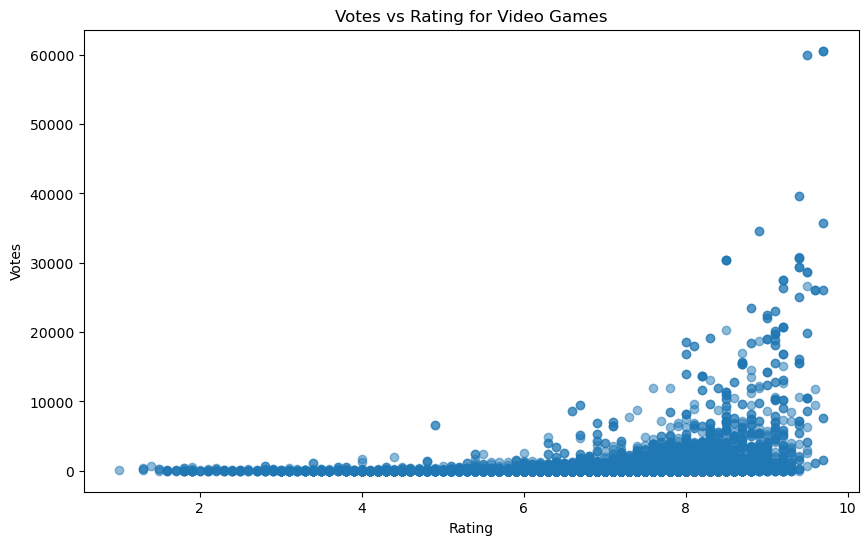

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(video_games["rating"], video_games["votes"], alpha=0.5)
plt.xlabel("Rating")
plt.ylabel("Votes")
plt.title("Votes vs Rating for Video Games")
plt.show()

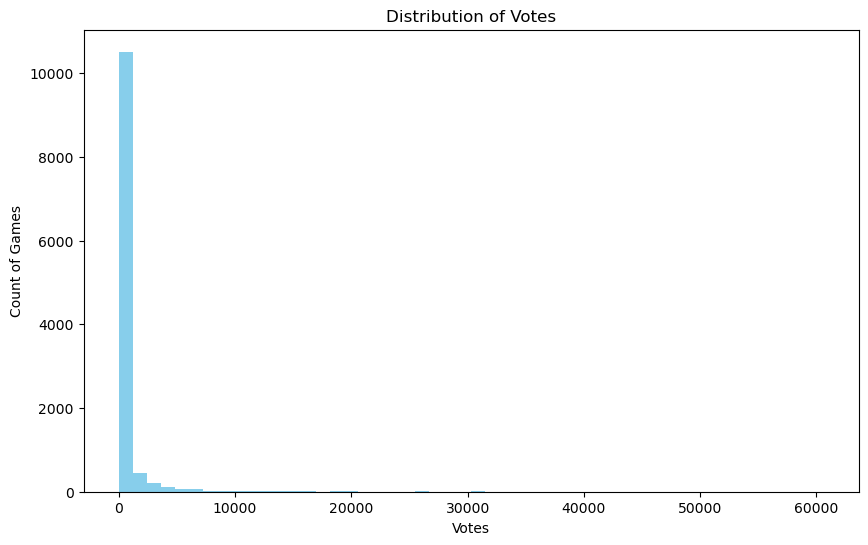

In [19]:
plt.figure(figsize=(10,6))
plt.hist(video_games["votes"], bins=50, color='skyblue')
plt.xlabel("Votes")
plt.ylabel("Count of Games")
plt.title("Distribution of Votes")
plt.show()

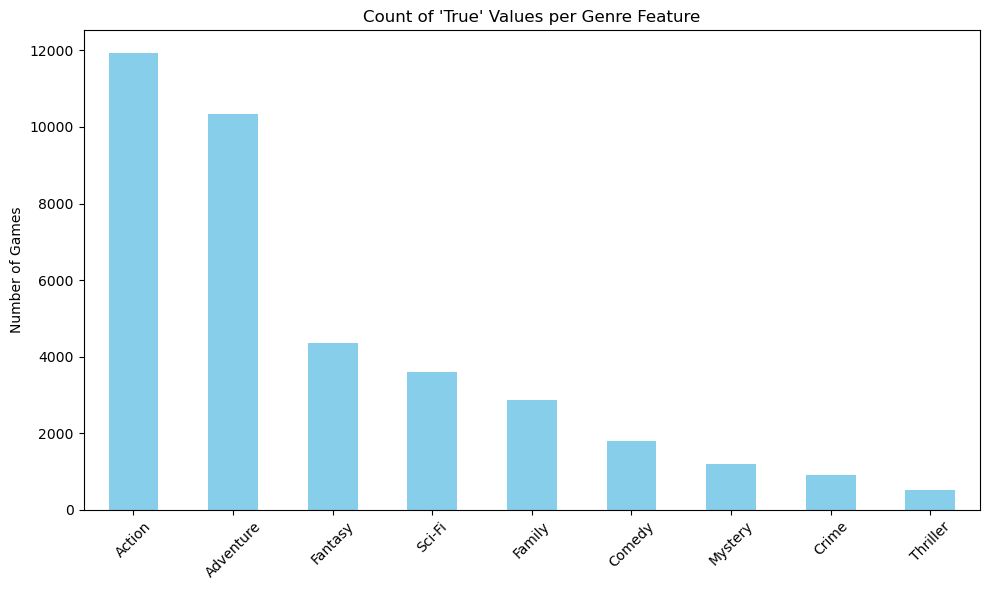

In [20]:
genre_cols = ["Action","Adventure","Comedy","Crime","Family",
              "Fantasy","Mystery","Sci-Fi","Thriller"]
true_counts = df[genre_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
true_counts.plot(kind="bar", color="skyblue")
plt.title("Count of 'True' Values per Genre Feature")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

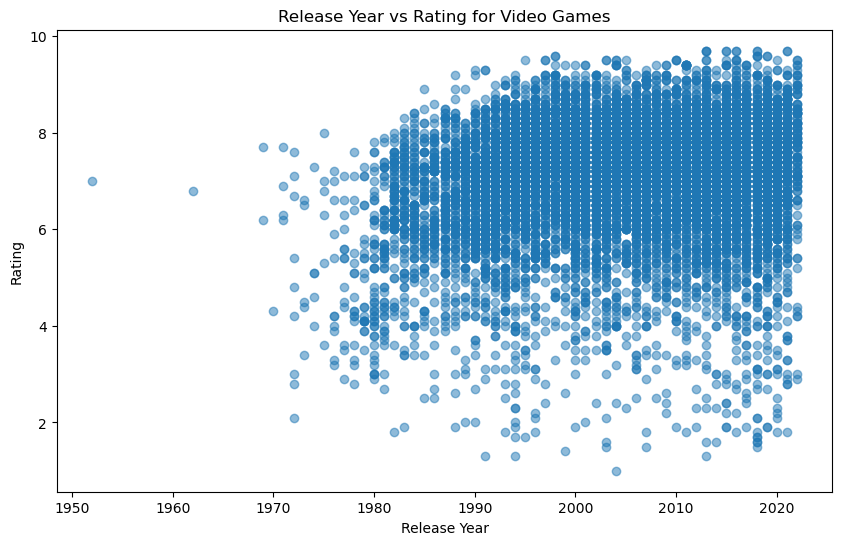

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(video_games["year"],video_games["rating"], alpha=0.5)
plt.ylabel("Rating")
plt.xlabel("Release Year")
plt.title("Release Year vs Rating for Video Games")
plt.show()

In [4]:
#divide dataframe for training and testing
X = video_games[["year", "votes", "Action","Adventure","Comedy","Crime",
        "Family","Fantasy","Mystery","Sci-Fi","Thriller"]]
y = video_games["rating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
#Base model with linear regression
model = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("linear", LinearRegression())
])

model.fit(X, y)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('linear', LinearRegression())])

In [6]:
#run linear model
model.fit(X_train, y_train)

preds = model.predict(X_test)
print(preds)

r2 = r2_score(y_test, preds)
print("R² score:", r2)

[7.2743276  6.63680789 6.90251564 ... 7.18817269 7.11119825 6.90786089]
R² score: 0.11587298047582617


R^2 is a metric showing how much variance is depicted by the model. The base model has around around 11.6 % variance in predictions.

In [7]:
round_pred = [round(num,1) for num in preds]
rating_comparison = pd.DataFrame({"actual": y_test, "predicted": round_pred})
rating_comparison.head(10)

,actual,predicted
18133,7.2,7.3
3879,5.0,6.6
3201,8.4,6.9
16325,4.3,6.7
2717,6.5,6.5
10191,7.6,7.6
2075,7.4,6.6
900,6.1,7.1
5592,8.0,6.7
562,8.5,7.6


In [8]:
#Accuracy function for model
def Accuracy_test():
    actual_average = rating_comparison["actual"].sum()/ len(rating_comparison["actual"])
    predicted_average = rating_comparison["predicted"].sum()/ len(rating_comparison["predicted"])
    difference = actual_average - predicted_average
    print("Actual Average:" + str(actual_average))
    print("Predicted Average:" + str(predicted_average))
    print("Difference:" + str(difference))

In [9]:
Accuracy_test()

Actual Average:7.02125
Predicted Average:7.054094827586207
Difference:-0.03284482758620655


In [ ]:
#model with ridge regression
model = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1.0))
])

model.fit(X, y)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('ridge', Ridge())])

In [11]:
model.fit(X_train, y_train)

preds = model.predict(X_test)
print(preds)

r2 = r2_score(y_test, preds)
print("R² score:", r2)

[7.27431427 6.63686006 6.90250905 ... 7.18817806 7.11120815 6.90788966]
R² score: 0.11587564477366641


In [12]:
round_pred = [round(num,1) for num in preds]
rating_comparison = pd.DataFrame({"actual": y_test, "predicted": round_pred})
rating_comparison.head(10)

,actual,predicted
18133,7.2,7.3
3879,5.0,6.6
3201,8.4,6.9
16325,4.3,6.7
2717,6.5,6.5
10191,7.6,7.6
2075,7.4,6.6
900,6.1,7.1
5592,8.0,6.7
562,8.5,7.6


In [13]:
Accuracy_test()

Actual Average:7.02125
Predicted Average:7.054094827586207
Difference:-0.03284482758620655


In [ ]:
#random forest model
model = RandomForestRegressor(n_estimators=200)
model.fit(X_train, y_train)

pred = model.predict(X_test)
round_pred = [round(num,1) for num in preds]
print(round_pred)
rating_comparison = pd.DataFrame({"actual": y_test, "predicted": round_pred})
rating_comparison.head(10)

[np.float64(7.3), np.float64(6.6), np.float64(6.9), np.float64(6.7), np.float64(6.5), np.float64(7.6), np.float64(6.6), np.float64(7.1), np.float64(6.7), np.float64(7.6), np.float64(7.3), np.float64(7.0), np.float64(6.6), np.float64(6.5), np.float64(6.9), np.float64(7.0), np.float64(6.9), np.float64(7.1), np.float64(7.1), np.float64(7.2), np.float64(6.6), np.float64(6.7), np.float64(6.7), np.float64(6.9), np.float64(6.6), np.float64(6.7), np.float64(6.3), np.float64(6.7), np.float64(6.6), np.float64(7.4), np.float64(7.1), np.float64(6.5), np.float64(6.9), np.float64(6.8), np.float64(7.9), np.float64(7.2), np.float64(6.9), np.float64(7.7), np.float64(7.0), np.float64(7.3), np.float64(7.1), np.float64(7.1), np.float64(6.6), np.float64(7.0), np.float64(6.7), np.float64(7.0), np.float64(7.3), np.float64(7.2), np.float64(6.9), np.float64(6.7), np.float64(7.4), np.float64(6.3), np.float64(7.3), np.float64(6.8), np.float64(7.4), np.float64(7.3), np.float64(7.2), np.float64(7.1), np.float64(6.

,actual,predicted
18133,7.2,7.3
3879,5.0,6.6
3201,8.4,6.9
16325,4.3,6.7
2717,6.5,6.5
10191,7.6,7.6
2075,7.4,6.6
900,6.1,7.1
5592,8.0,6.7
562,8.5,7.6
